## Question :
    
    
   
**Three archers – Pat, Jack, and Alex are participating in an archery contest. They are shooting at targets with 10 evenly spaced concentric rings. The rings have score values from 1 through 10 assigned to them, with 10 being the highest. Each participant shoots 6 arrow, scoring the following points:
Pat – 5, 4, 4, 3, 9, 4 Jack – 4, 8, 7, 5, 1, 5 Alex – 9, 9, 8, 10, 4, 10**

<h2>H0 = mean of all samples are equal
    
H1 = Mean of all samples are not equal<h2>

In [1]:
import pandas as pd

pat = [5, 4, 4, 3, 9, 4]
jack = [4, 8, 7, 5, 1, 5]
alex = [9, 9, 8, 10, 4, 10]


total_score = pat+jack+alex
total_score


[5, 4, 4, 3, 9, 4, 4, 8, 7, 5, 1, 5, 9, 9, 8, 10, 4, 10]

In [2]:
names = (["Pat"]*len(pat) + ["Jack"]*len(jack) + ["Alex"]*len(alex))

In [3]:
data = pd.DataFrame({"Names":names, "Score":total_score})
data

,Names,Score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


Now we have to find mean of the total square 

In [4]:
full_score_mean = data["Score"].mean()
full_score_mean

6.055555555555555

Now we have to find individual mean and sum of squares of the samples

In [5]:
pat_sr = pd.Series(pat)
pat_mean = pat_sr.mean()
pad_sum = sum((pat_sr-pat_mean)**2)
pad_sum

22.833333333333332

In [6]:
jack_sr = pd.Series(jack)
jack_mean = jack_sr.mean()
jack_sum = sum((jack_sr-jack_mean)**2)
jack_sum

30.0

In [7]:
alex_sr = pd.Series(alex)
alex_mean = alex_sr.mean()
alex_sum = sum((alex_sr-alex_mean)**2)
alex_sum

25.333333333333332

Now we will find sum of squares within groups

In [8]:
SSW = pad_sum + jack_sum + alex_sum
SSW

78.16666666666666

Now we will find totoal sum of squares

In [9]:
score_sr = pd.Series(data["Score"])
score_mean = score_sr.mean()
score_sum = sum((score_sr - score_mean)**2)
score_sum

124.94444444444446

Now we will find sum of squares between the groups

In [10]:
SSB = score_sum - SSW
SSB

46.7777777777778

Now we will find degree of freedom for SSW

In [11]:
v1 = 18-3
v1

15

Now we will divide SSW by degree of freedom of SSW

In [12]:
SSW_result = SSW/v1
SSW_result

5.21111111111111

Now we will calculate degree of freedom for SSB

In [13]:
v2 = 3-1
v2

2

Now we will divide SSB by degree of freedom of SSB

In [14]:
SSB_result = SSB/2
SSB_result

23.3888888888889

now we will calculate value for f


In [15]:
f = SSB_result/SSW_result
f

4.488272921108745

# Now we want to check that whether our result is correct##

# We will use scipy module to find the f statistic##

In [16]:
import scipy
from scipy import stats

f, p= stats.f_oneway(data[data['Names'] == 'Pat'].Score,
                      data[data['Names'] == 'Jack'].Score,
                      data[data['Names'] == 'Alex'].Score)
print(f)
print(p)

4.4882729211087415
0.029667763955533364


# so from above calculation we got our f and p value 

# Now we will find the crtical value for the same

In [17]:
critical_value = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=15)
critical_value

3.6823203436732412

# Our critical value is lesser than F value and p value is less that 0.05

# So we can reject the null hypotheses which was that means of all population are equal


# Now we will plot the mean score of each player to find who is better Archer

<AxesSubplot:>

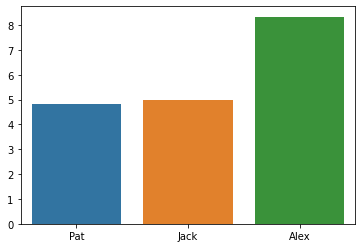

In [18]:
import seaborn as sns

sns.barplot(x = ["Pat", "Jack", "Alex"], y=[pat_mean, jack_mean, alex_mean])

# So by observing the above Graph Alex is the Best Archer